In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

## K-Means
Amaç gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır.
* Kendi içinde kümeler homojen
* Kümeler arası heterojen

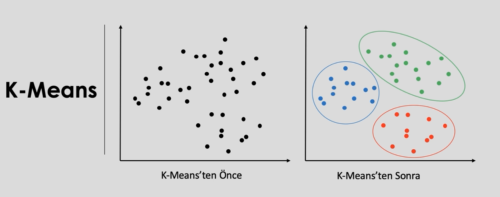 <br>

* Adım1: Küme sayısı belirlenir

* Adım 2: Rastgele k merkez seçilir.

* Adım 3: Her gözlem için k merkezlere uzaklıklar hesaplanır ve gözlemler kendisine en yakın k merkezine atanır.

* Adım 4: Her gözlem en yakın olduğu merkeze yani kümeye atanır.

* Adım 5: Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.

* Adım 6: Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamlarının toplamının (total within-cluster variation) minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.

In [2]:
arrest = pd.read_csv('USArrests.csv')
df =  arrest.copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
# state name model oluşumunda ayırt edici bir özellik değildir.
# gruplandırmada fark edebilmek için index olarak atadık

In [3]:
df = df.rename(columns = {'Unnamed: 0' : 'States'})
df.index = df.States
df = df.drop('States',axis=1)
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


****verilen değerler belirli bir kesim üzerinden oranlama yapılarak bulunmuştur.****
* Murder => Cinayetler
* Assault => Saldırı
* UrbanPop => Eyalet populasyonu oranı
* Rape => Tecavüz

In [4]:
# null check

In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
# info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [8]:
# betimsel istatistik

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [10]:
# cinayet değeri gruplandırmada önemli olacaktır. Çünkü en az karşılaşılan olay olduğundan 
# farklı değişkenler yaratmada kullanılabilir.

# örn quartile değerlerini kullanarak 25% => 0 | 50% => 1 | 75% => 2 |  gibi derecelendirme yaparak gruplandırmada murder'ı öne çıkarabiliriz.
# çünkü normal halde murder ile assault aynı öneme sahip olacak.

In [11]:
# histogram

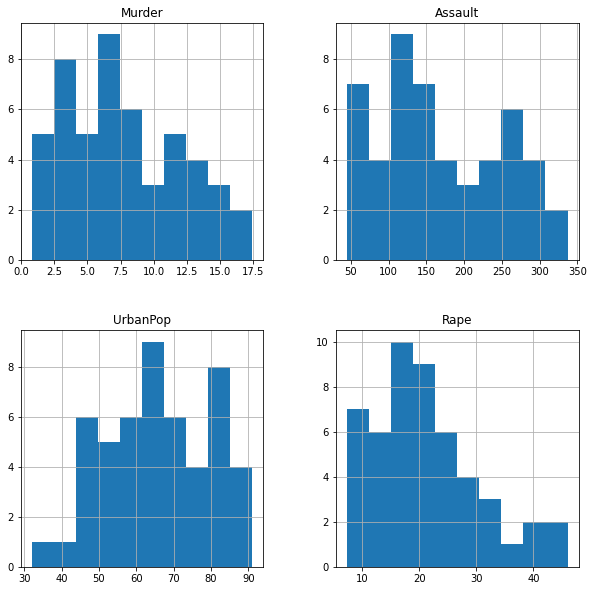

In [12]:
df.hist(figsize=(10,10));

## K-MEANS Model ve Görselleştirme

In [13]:
kmeans = KMeans(n_clusters=4) 

In [14]:
# n_init : tekrar sayısı
# n_clusters : küme sayısı

In [15]:
k_fit = kmeans.fit(df)

In [16]:
k_fit.n_clusters

4

In [17]:
# merkezler

In [18]:
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [33]:
# gözlemlerin hangi sınıfta olduğu

In [19]:
k_fit.labels_

array([2, 2, 2, 0, 2, 0, 3, 2, 2, 0, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 0, 2,
       1, 2, 0, 3, 3, 2, 1, 0, 2, 2, 2, 1, 3, 0, 0, 3, 0, 2, 1, 0, 0, 3,
       1, 0, 0, 1, 1, 0], dtype=int32)

### görselleştirme

In [20]:
kmeans = KMeans(n_clusters=2)

In [21]:
kfit = kmeans.fit(df)

In [22]:
kumeler = kfit.labels_

In [23]:
# iki değişken üzerinden (2-boyutlu)

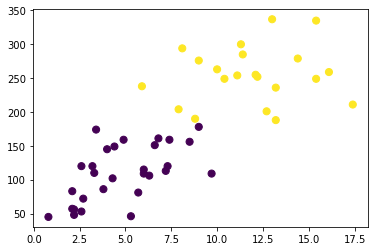

In [24]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler, s=50, cmap='viridis');

In [45]:
# merkezleri işaretleme

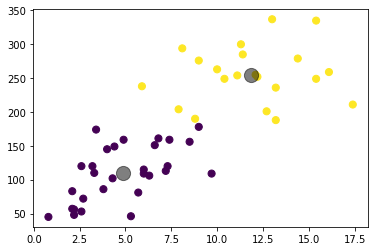

In [25]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler, s=50, cmap='viridis');
merkezler = kfit.cluster_centers_

plt.scatter(merkezler[:,0],merkezler[:,1],c='black',s=200,alpha = 0.5);

In [26]:
from mpl_toolkits.mplot3d import Axes3D

In [27]:
kmeans = KMeans(n_clusters=3)
kfit = kmeans.fit(df)
kumeler = kfit.labels_
merkezler = kmeans.cluster_centers_

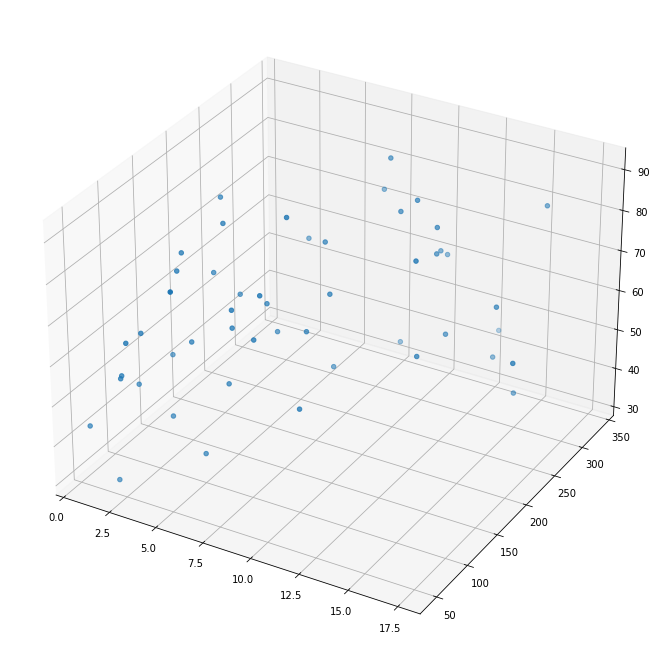

In [28]:
plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]);

In [53]:
# kümelerin | merkezlerin gösterimi - 3D 

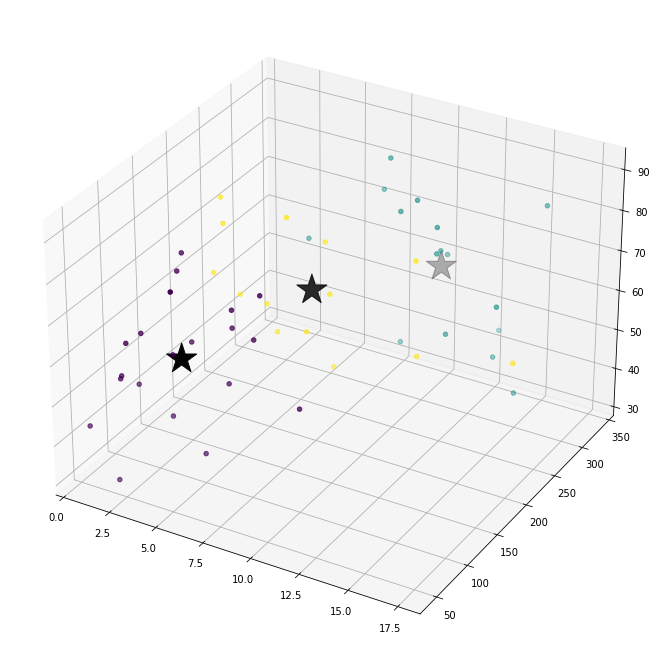

In [29]:
plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=kumeler);
ax.scatter(merkezler[:,0],merkezler[:,1],merkezler[:,2],marker='*',c='#050505',s=1000);

In [55]:
# label'ları dataframe'e değişken olarak ekleme

In [30]:
kmeans = KMeans(n_clusters=3)
kfit = kmeans.fit(df)
cluster = kfit.labels_

In [31]:
pd.DataFrame({'Eyaletler' : df.index, 'Kumeler' : cluster}).head()

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1


In [32]:
df['cluster'] = cluster

In [33]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


## Optimum Kume Sayısının Belirlenmesi
Her bir kümenin elemanlarının merkeze uzaklığının ortalaması alınıp bir distance hata değeri hesaplanır. <br>
Amaç bu değeri en düşüğe çekmektir. <br> <br>

Bunu düşürmek için küme(cluster) sayısı ile oynayabiliriz <br>

* Elbow Yöntemini kullanacağız.

In [34]:
from yellowbrick.cluster import KElbowVisualizer

In [35]:
kmeans = KMeans()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


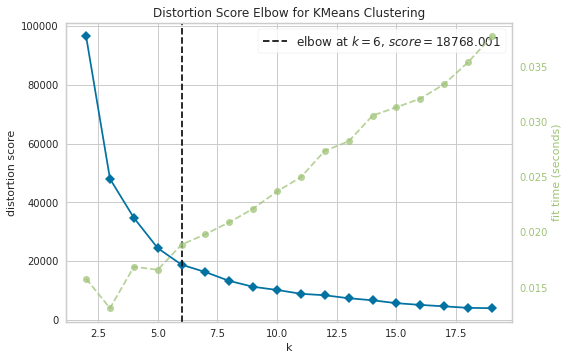

In [36]:
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(df)
visualizer.poof();

* Bu gibi görsellerden kaç kümeye ayıracağımız hakkında sadece bu görseli kullanarak ****yorum yapmak yanlış olur.**** <br>
* Küme sayısı ****arttıkça**** distance değeri normal olarak ****düşecektir.****
* Eğer örnek sayısı kadar küme olursa distance=0 olacaktır.
* Burada önemli olan 3 mü 4 mü gibi 2 veya 3 seçenek arasında takıldığımızda ****(+küme)/performans**** ölçümü yapmamıza olanak sağlar.

In [81]:
# bu örnekte 3 veeya 4 arasında takıldık diyelim.
# 4 küme verinin bütününe zarar vermiyor ise 4 küme daha performanslı gözüküyor

In [82]:
# verinin bütününe zarar'dan kasıt nedir?
# Eğer 4 tane küme oluşturursak 4 kümeyide tam olarak açıklayamıyor isek bir sıkıntı vardır.
# Örn Ödeme yöntemi alışkanlığı ile ilgili bir veri setinde 2 adet küme olması daha mantıklı iken 3-4 kümeyi açıklamak zor.

In [83]:
kmeans = KMeans(n_clusters=4)

In [84]:
kfit = kmeans.fit(df)

## Hiyerarşik Kümeleme
Amaç gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmaktır. <br>
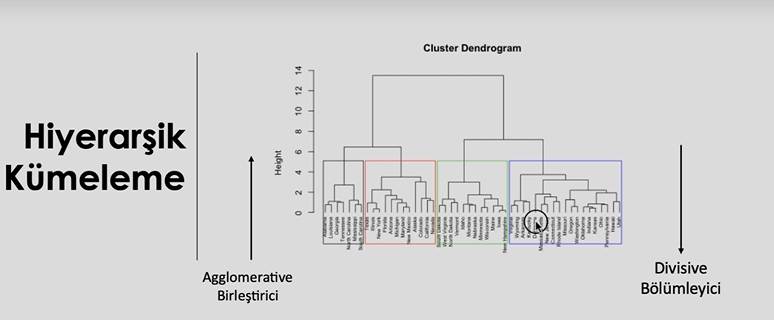 <br>

***Agglomerative (Birleştirici)*** : <br>
* Kümeler en alt tabakadan en küçük benzerlikler ile kümeler oluşturulur. (0 - tabakası)
* alt kümeler benzerliklere göre birleştirilir ve üst kümeler oluşturulur. (14 - tabakası) <br>

***Divisive (Bölümleyici)*** : <br>
* Kümeler ilk önce 2 ye ayrılır. (14 - tabakası)
* alt kümeler birbirine benzemeyen 2 kümeye ayrılır.
* bu ayrım benzerliklerin çoğalmasına dek sürer. (0 - tabakası)

### Farklar
* Hiyerarşik Kümeleme'de küme sayısı dendogram üzerinden (***görseldeki kutular***) karar verilebilir.
* Hiyerarşik olmayan Kümeleme'de küme sayısı ***önceden*** belirlenir.
* Hiyerarşik Kümeleme'de ***değişkenlere veya gözlemlere*** göre ***kümeleme*** yapılabilir.(Dataframe ***transpozu*** alınarak gözlemler değişkenler olur)
* Hiyerarşik olmayan Kümeleme'de ***sadece gözlemler*** üzerinden kümeleme yapılır.


### Agglomerative (Birleştirici)
* Başlangıçta ***gözlem sayısı kadar*** küme vardır.

* Adım 1: Veri setinde birbirine en yakın olan iki gözlem bulunur.

* Adım 2: Bu iki nokta bir araya getirilerek yeni bir gözlem oluşturulur. Yani artık veri seti ilk birleşimdeki gözlemlerden oluşmaktadır.

* Adım 3: Aynı işlem tekrarlanarak kadar yukarı doğru çıkılır. Yani iki kümenin birleşiminden oluşan bu yeni kümeler aynı şekilde birbirlerine benzerliklerine göre tekrar birleştirilir. Bu işlem tüm gözlemler tek bir küme de toplanana kadar bu işlemler tekrar edilir.

* Birbirine yakın noktalar uzaklık ölçüleri kullanarak belirlenir. Öklit uzaklığı, manhattan uzaklığı, korelasyon vs

### Divisive (Bölümleyici)
* Başlangıçta 1 tane küme vardır, o da tüm veri setidir.

* Adım 1: Tüm gözlemlerin bir arada olduğu küme iki alt kümeye ayrılır.

* Adım 2: Oluşan yeni kümeler birbirlerine benzemeyen alt kümelere bölünür.

* Adım 3: Aynı işlem gözlem sayısı kadar kümelde edilinceye kadar tekrar edilir.


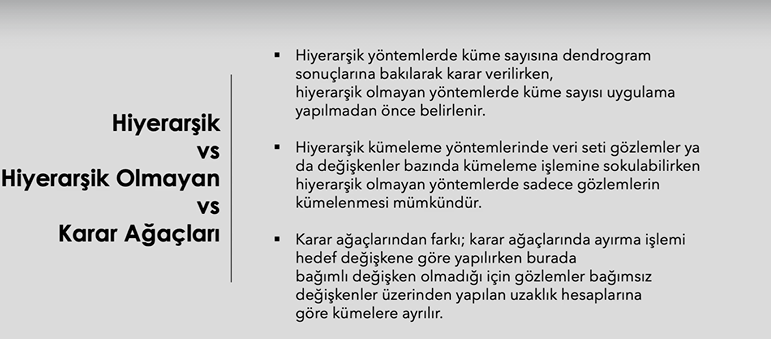 <br>

### Hiyerarşik Kümeleme

In [2]:
df = pd.read_csv('USArrests.csv').copy()
df = df.rename(columns={'Unnamed: 0':'States'})
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
from scipy.cluster.hierarchy import linkage

In [4]:
# methodlar - hesaplamalar yapıldı

In [5]:
hc_complete = linkage(df,'complete')
hc_average = linkage(df,'average')
hc_single = linkage(df,'single')

In [6]:
# kümeleme yapısı gözlemleme

In [7]:
from scipy.cluster.hierarchy import dendrogram

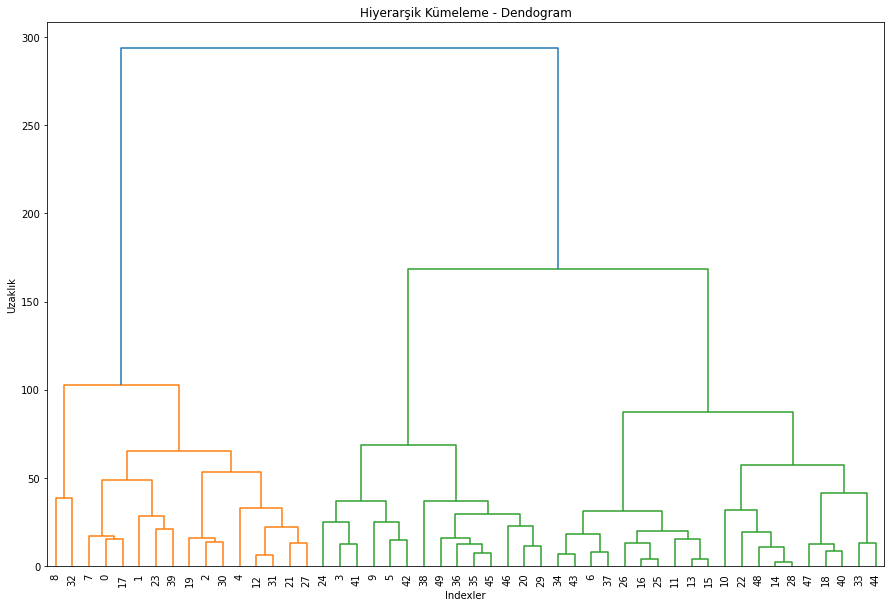

In [8]:
plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')

# dendogram yapısı gözlemleme
dendrogram(hc_complete,leaf_font_size=10); 

In [54]:
# bu işlemi gözlemlerin az olduğu (100-500) durumlarda kullanmak mantıklı olabilir.

In [55]:
# yeşil ve kırmızı ayrı 2 küme

In [62]:
# son 12 birleşen kümeyi göster

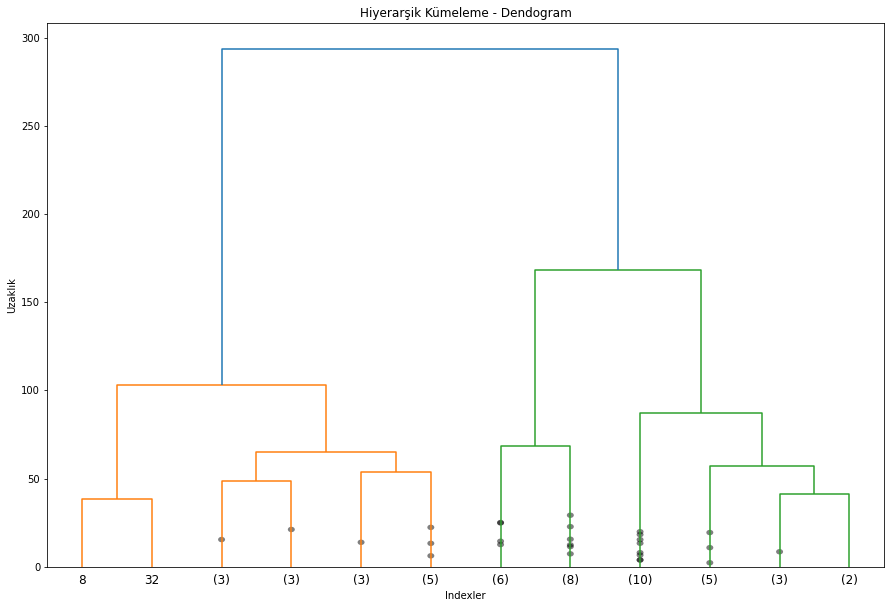

In [9]:
plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')

dendrogram(hc_complete,
           truncate_mode='lastp',
           p=12, 
           show_contracted=True); 

### Optimum Küme Sayısı

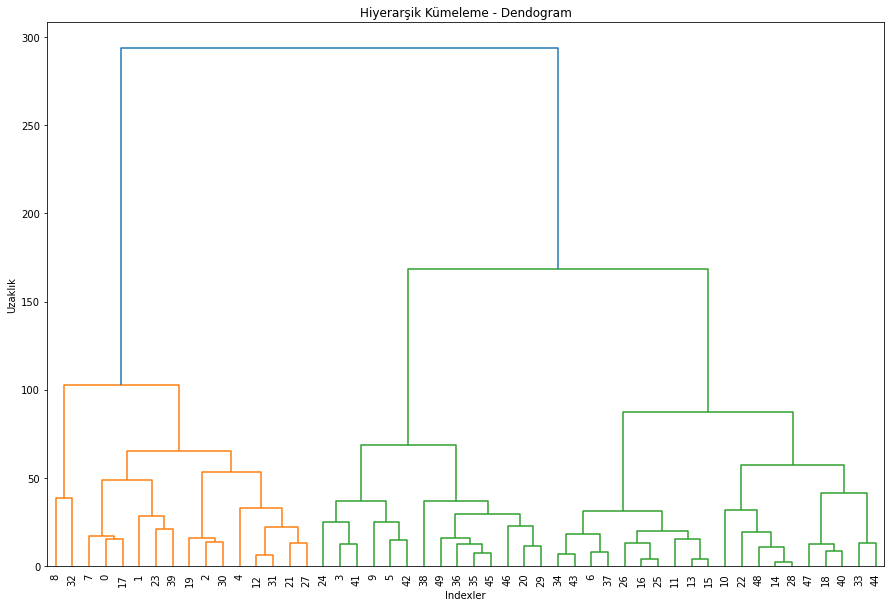

In [10]:
plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')

# dendogram yapısı gözlemleme
dendrogram(hc_complete,
           leaf_font_size=10); 

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
# görsele bakarak 4 kümenin mantıklı olacağına karar verdik diyelim

In [20]:
cluster = AgglomerativeClustering(n_clusters=4,
                                  affinity='euclidean',
                                  linkage='ward') 

# uzaklık metriği euclidean : oklidyen
# methodlar : linkage : ward (ward || complete || single || average --- farklı methodlar var)

In [21]:
cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [ ]:
# dataframe üzerinde gösterim

In [23]:
pd.DataFrame({'States' : df.index, 'Clusters' : cluster.fit_predict(df)}).head()

,States,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0


## Temel Bileşen Analizi (PCA)
Temel fikir, çok değişkenli verinin ana özelliklerini daha ***az sayıda değişken/bileşen*** ile temsil etmektir. <br>
Diğer bir ifade ile: küçük miktarda bir ***bilgi kaybını*** göze alıp değişken ***boyutunu azaltmaktır.*** <br>
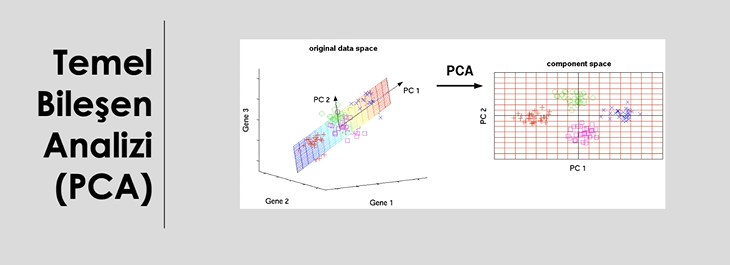 <br>
Amaç ana değişkenliği koruyarak küçük veri kaybı ile boyut indirgemektir.

### PCAdf = pd.read_csv('USArrests.csv').copy()
df = df.rename(columns={'Unnamed: 0':'States'})
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.head()

In [52]:
df = pd.read_csv('USArrests.csv').copy()
df = df.rename(columns={'Unnamed: 0':'States'})
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [27]:
# temel bileşen analizi için değişkenleri standartlarştırmamız lazım

In [28]:
from sklearn.preprocessing import StandardScaler

In [43]:
df_standart = StandardScaler().fit_transform(df)
df_standart[:5,:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [44]:
# pca

In [45]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=3) # indirgenecek bileşen sayısı

In [67]:
pca_fit = pca.fit_transform(df_standart)

In [68]:
# dataframe oluşturma

In [75]:
standarted_df = pd.DataFrame(data = pca_fit , columns=['first_var','second_var','third_var'])

In [76]:
# yeni dataframe

In [77]:
standarted_df.head()

,first_var,second_var,third_var
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [78]:
# eski dataframe

In [79]:
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [80]:
# peki bu pca veriseti orjinal veri setinin değişkenliğini ne kadar açıklayabiliyor?

In [81]:
# kümülatif düşünelim.

In [83]:
pca.explained_variance_ratio_.cumsum() # 3. değer 3 değişkenin birlikte açıklama oranı

array([0.62006039, 0.86750168, 0.95664248])

In [84]:
# 1 değişken ile : 67%
# 2 değişken ile : 86%
# 3 değişken ile : 95%

In [85]:
# bileşen sayısı  - açıklanabilirlik oranı grafik

In [86]:
pca = PCA().fit(df)

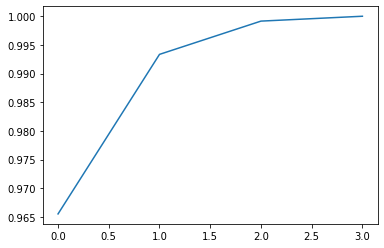

In [91]:
plt.plot( pca.explained_variance_ratio_.cumsum());